In [1]:
import os
import rrtmg as FLUXES
import numpy as np

In [2]:
## Profiles
z = np.loadtxt("/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/retrieval/trace_gases/z.csv", delimiter=",")
co2 = np.loadtxt("/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/retrieval/trace_gases/co2.csv", delimiter=",")
o3 = np.loadtxt("/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/retrieval/trace_gases/o3.csv", delimiter=",")
ch4 = np.loadtxt("/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/retrieval/trace_gases/ch4.csv", delimiter=",")
n2o = np.loadtxt("/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/retrieval/trace_gases/n2o.csv", delimiter=",")

In [3]:
o3

array([0.02421504, 0.0244368 , 0.024648  , 0.024912  , 0.025176  ,
       0.02544   , 0.025704  , 0.025968  , 0.0260208 , 0.0260736 ,
       0.0261264 , 0.0261792 , 0.026232  , 0.026496  , 0.02676   ,
       0.0268656 , 0.0271296 , 0.0273936 , 0.0279216 , 0.0282384 ,
       0.0283968 , 0.0286608 , 0.0289776 , 0.029839  , 0.0304975 ,
       0.031156  , 0.032034  , 0.032912  , 0.03379   , 0.034806  ,
       0.035822  , 0.036838  , 0.037854  , 0.03887   , 0.040052  ,
       0.042416  , 0.043598  , 0.04478   , 0.04648   , 0.04818   ,
       0.05073   , 0.05328   , 0.056988  , 0.060696  , 0.064404  ,
       0.067988  , 0.07151   , 0.075032  , 0.078756  , 0.082884  ,
       0.087012  , 0.09114   , 0.111484  , 0.131828  , 0.1514    ,
       0.1702    , 0.189     , 0.247     , 0.305     , 0.3575    ,
       0.41      , 0.455     , 0.5       , 0.6       , 0.7       ,
       1.3       , 2.1       , 4.5       , 5.7       ])

In [4]:
path_retrievals = "/home/philipp/Doktorandenzeit/DATA_PHD/RRTMG/INPUT/INPUT_FOR_RRTMG/RRTMG_input_nomod"
ssp_ice = "/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/ssp_database/ssp_db.Droxtal.gamma.0p100"
files = sorted(os.listdir(path_retrievals))

In [5]:
model = FLUXES.RRTMG(os.getcwd() + "/rrtmg_lw_v5.00_linux_pgi", os.getcwd() + "/rrtmg_sw_v5.00_linux_pgi", \
                  ["/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/ssp_database/ssp_db.mie_wat.gamma_sigma_0p100", ssp_ice])

in_CNET_20170601_000544_80.323247_7.866752_77.43035169801307.nc


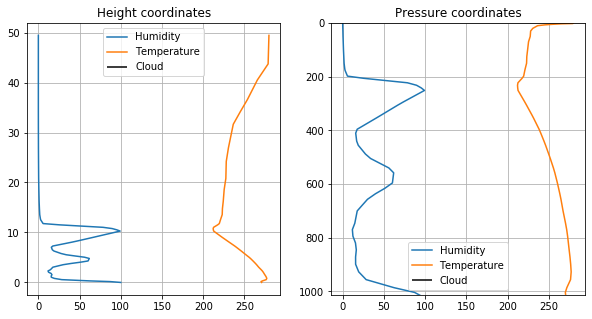

In [6]:
epsilon = 0.99*np.ones(16)
epsilon[np.array([5,6,7])] = 0.98
spec = files[0]
print(spec)
model.read_cloudnet(os.path.join(path_retrievals, spec))
model.get_cparam(), model.get_position()
model.plot_atmosphere()

In [7]:
o3_ppmv = 0.*np.ones(z.size)#np.ones(z.size)#28.9644 / 47.9982 * 1e6 * o3
co2 = np.zeros(z.size)
n2o = np.zeros(z.size)
ch4 = np.zeros(z.size)
tg = model.read_trace_gases(z, co2, n2o, ch4, o3_ppmv)
#model.plot_atmosphere()

In [8]:
epsilon = 0.99*np.ones(16)
atm = "H444444"#"HAAA4A4"
epsilon[np.array([7,8,9,10])] = 0.98
in_cld_rrtm = model.create_inputfile_cloud()
input_rrtm = model.create_inputfile_atm_terrestrial(cloud=0, semiss=epsilon, atm=atm)
model.run_RRTMG_terrestrial(clouds=False)
input_rrtm = model.create_inputfile_atm_terrestrial(cloud=2, semiss=epsilon, atm=atm)
model.run_RRTMG_terrestrial(clouds=True)
input_rrtm = model.create_inputfile_atm_solar(cloud=0, atm=atm)
model.run_RRTMG_solar(clouds=False)
input_rrtm = model.create_inputfile_atm_solar(cloud=2, atm=atm)
model.run_RRTMG_solar(clouds=True)

In [9]:
fluxes_all = model.get_fluxes_terrestrial(17)['all']['DOWNWARD FLUX']-\
    model.get_fluxes_terrestrial(17)['clear']['DOWNWARD FLUX'] - \
    model.get_fluxes_terrestrial(17)['all']['UPWARD FLUX'] + \
    model.get_fluxes_terrestrial(17)['clear']['UPWARD FLUX']

In [10]:
print(input_rrtm)

$ RRTM_SW runscript created on 2021-07-20 12:23:04.858760                       
                   0                             1                                1     98   12   00
            151   77.4304    0 1370.0000   0.00000
           1  00.010
    0        74         0    7    1    1     0.000                       410.000     0.000
     0.000    49.440
     0.000     0.170     0.310     0.560     0.810     1.050     1.300     1.550
     1.800     2.050     2.300     2.550     2.800     3.050     3.300     3.550
     3.800     4.050     4.300     4.550     4.800     5.050     5.290     5.540
     5.790     6.040     6.290     6.540     6.790     7.040     7.290     7.540
     7.790     8.040     8.290     8.540     8.790     9.040     9.290     9.540
     9.780    10.030    10.280    10.530    10.780    11.030    11.280    11.530
    11.780    12.030    12.280    12.530    12.780    12.790    12.820    12.860
    12.890    12.920    12.950    12.980    13.010    13.570    14.

In [21]:
np.array(model.get_fluxes_solar(30)['clear']['DOWNWARD FLUX'])

array([289.808 , 287.4545, 286.3649, 284.9986, 284.0146, 282.8942,
       280.2214, 278.1722, 275.1435, 272.9677, 270.4859, 268.7201,
       267.1064, 266.2926, 266.2477, 266.2027, 266.1576, 266.1123,
       266.0669, 266.0063, 265.9607, 265.9454, 265.5599, 265.1609,
       264.7447, 264.3143, 263.8107, 263.1747, 262.4825, 261.78  ,
       261.072 , 260.3554, 259.6163, 258.8413, 258.0639, 257.2239,
       256.3572, 255.4653, 254.5516, 253.6221, 252.6866, 251.76  ,
       250.8623, 250.018 , 249.1937, 248.3201, 247.3667, 246.3092,
       245.0815, 243.6383, 241.9566, 239.9462, 237.6724, 235.1282,
       232.6596, 230.3389, 228.2406, 226.4579, 224.9567, 223.6546,
       222.5094, 221.4415, 220.3793, 219.3597, 218.3496, 217.2385,
       216.018 , 214.7763, 213.5361, 212.2604, 210.7128, 208.7615,
       207.4344, 205.6637])

In [12]:
flux

NameError: name 'flux' is not defined

In [18]:
model.write_results("/home/philipp/out.nc")